In [1]:
import pandas as pd

## Data Preprocessing

In [2]:
data = pd.read_csv("data/loan_data.csv")

In [3]:
data = data.drop("Unnamed: 0", axis=1)

In [4]:
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,39651438,NaN,32000.0,32000.0,32000.0,60 months,10.49,687.65,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,16411620,NaN,9600.0,9600.0,9600.0,36 months,12.99,323.42,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,45122316,NaN,4000.0,4000.0,4000.0,36 months,6.68,122.93,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,125356772,NaN,6025.0,6025.0,6025.0,36 months,10.91,197.00,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,128490686,NaN,25000.0,25000.0,25000.0,60 months,26.30,752.96,E,E5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22586,126862437,NaN,25000.0,25000.0,25000.0,60 months,11.99,555.99,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
22587,143514465,NaN,1700.0,1700.0,1675.0,36 months,7.56,52.93,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
22588,135390922,NaN,12000.0,12000.0,12000.0,60 months,14.03,279.41,C,C2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
22589,70411635,NaN,16500.0,16500.0,16500.0,60 months,20.50,441.76,E,E4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


### Identify and Remove Leakage Features

In [5]:
data = data.drop(["total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "last_pymnt_d", "last_pymnt_amnt", "recoveries", "collection_recovery_fee", "out_prncp", "out_prncp_inv", "funded_amnt", "funded_amnt_inv", "last_credit_pull_d", "last_fico_range_high", "last_fico_range_low", "acc_now_delinq", "delinq_amnt"], axis=1)

### Handle missing data.

**i) Drop columns with >20% missing values**


In [6]:
percentMissing = (data.isna().sum() / len(data)).sort_values(ascending=False)
for col in percentMissing[percentMissing>0.2].index:
    print(col)

member_id
orig_projected_additional_accrued_interest
hardship_payoff_balance_amount
payment_plan_start_date
hardship_last_payment_amount
hardship_end_date
hardship_length
hardship_loan_status
hardship_dpd
hardship_type
hardship_reason
hardship_start_date
hardship_status
hardship_amount
deferral_term
sec_app_mths_since_last_major_derog
settlement_percentage
settlement_term
debt_settlement_flag_date
settlement_amount
settlement_status
settlement_date
sec_app_revol_util
sec_app_mort_acc
sec_app_open_acc
sec_app_num_rev_accts
sec_app_earliest_cr_line
sec_app_open_act_il
sec_app_inq_last_6mths
sec_app_fico_range_high
sec_app_fico_range_low
sec_app_chargeoff_within_12_mths
sec_app_collections_12_mths_ex_med
revol_bal_joint
verification_status_joint
dti_joint
annual_inc_joint
desc
mths_since_last_record
mths_since_recent_bc_dlq
mths_since_last_major_derog
mths_since_recent_revol_delinq
next_pymnt_d
mths_since_last_delinq
il_util
mths_since_rcnt_il
open_rv_24m
max_bal_bc
all_util
open_rv_12m
i

In [7]:
data = data.drop(percentMissing[percentMissing>0.2].index, axis=1)

**ii) Impute remaining missing values:**

- Numerical columns: Use median (robust to outliers)
- Categorical columns: Use ‘Unknown’ as a new category

In [8]:
missingValues = data.isna().sum()
for col in missingValues[missingValues > 0].index:
    if data[col].dtype == object:
        data[col] = data[col].fillna("Unknown")
    else:
        data[col] = data[col].fillna(data[col].median())

### Drop Non-Informative Columns

In [9]:
pd.set_option('display.max_columns', None)

There's way too many values in these columns to be useful...

In [10]:
len(data["emp_title"].unique())

11770

In [11]:
len(data["addr_state"].unique())

51

In [12]:
data[["id", "loan_amnt", "url", "emp_title", "zip_code", "addr_state"]]

,id,loan_amnt,url,emp_title,zip_code,addr_state
0,39651438,32000.0,https://lendingclub.com/browse/loanDetail.acti...,Public Service,919xx,CA
1,16411620,9600.0,https://lendingclub.com/browse/loanDetail.acti...,Unknown,331xx,FL
2,45122316,4000.0,https://lendingclub.com/browse/loanDetail.acti...,System Analyst,333xx,FL
3,125356772,6025.0,https://lendingclub.com/browse/loanDetail.acti...,Admin assistant,021xx,MA
4,128490686,25000.0,https://lendingclub.com/browse/loanDetail.acti...,Coordinator,926xx,CA
...,...,...,...,...,...,...
22586,126862437,25000.0,https://lendingclub.com/browse/loanDetail.acti...,Director of New Play Development,602xx,IL
22587,143514465,1700.0,https://lendingclub.com/browse/loanDetail.acti...,Batch Ops Production Support Analyst,194xx,PA
22588,135390922,12000.0,https://lendingclub.com/browse/loanDetail.acti...,Assistant Sales Manager,770xx,TX
22589,70411635,16500.0,https://lendingclub.com/browse/loanDetail.acti...,Squad Leader,346xx,FL


None of these variables are very useful by themselves...

In [13]:
data = data.drop(["id", "loan_amnt", "url", "emp_title", "zip_code", "addr_state"], axis=1)

### Feature Engineering

**i) Date Features**


In [14]:
data["issue_d"]

0        Feb-2015
1        May-2014
2        Apr-2015
3        Dec-2017
4        Feb-2018
           ...   
22586    Jan-2018
22587    Nov-2018
22588    Jun-2018
22589    Feb-2016
22590    Dec-2015
Name: issue_d, Length: 22591, dtype: object

In [15]:
data["issuedDate"] = data["issue_d"].str.slice(-4).astype(int)

In [16]:
data["earliestCreditDate"] = data["earliest_cr_line"].str.slice(-4).astype(int)

In [17]:
data = data.drop(["issuedDate", "earliest_cr_line"], axis=1)

**ii) Term Feature**


In [18]:
data["termLength"] = data["term"].str.slice(1,4).astype(int)

**iii) High-Cardinality Categorical Features**


In [19]:
for col in data.select_dtypes("object").columns:
    print(col, len(data[col].unique()))

term 2
grade 7
sub_grade 35
emp_length 12
home_ownership 6
verification_status 3
issue_d 133
loan_status 8
pymnt_plan 2
purpose 14
title 1234
initial_list_status 2
application_type 2
hardship_flag 2
disbursement_method 2
debt_settlement_flag 2


These columns look problematic:

- `sub_grade`
- `issue_d`
- `title`

Let's just drop them...

In [20]:
data = data.drop(["sub_grade", "issue_d", "title"], axis=1)


**iv) One-Hot Encoding**

In [21]:
for col in data.select_dtypes("object").columns:
    data = pd.concat([data.drop(col, axis=1), pd.get_dummies(data[col], drop_first=True, prefix=col).astype(int)], axis=1)

### Filter Invalid Records.

In [22]:
data["int_rate"].describe()

count    22591.000000
mean        13.095236
std          4.981891
min        -11.547247
25%          9.440000
50%         12.620000
75%         15.990000
max         43.985799
Name: int_rate, dtype: float64

I don't think interest rate is supposed to be negative...

In [23]:
data = data[data["int_rate"] > 0]

## Linear Regression

### Data Preparation for Regression

**(i) Start with the cleaned dataset from Part 1**



**(ii) Remove regression-specific leakage features: grade, sub grade, installment, loan status**


In [24]:
for i in data.columns:
    print(i)

int_rate
installment
annual_inc
dti
delinq_2yrs
fico_range_low
fico_range_high
inq_last_6mths
open_acc
pub_rec
revol_bal
revol_util
total_acc
collections_12_mths_ex_med
policy_code
tot_coll_amt
tot_cur_bal
total_rev_hi_lim
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
bc_util
chargeoff_within_12_mths
mo_sin_old_il_acct
mo_sin_old_rev_tl_op
mo_sin_rcnt_rev_tl_op
mo_sin_rcnt_tl
mort_acc
mths_since_recent_bc
mths_since_recent_inq
num_accts_ever_120_pd
num_actv_bc_tl
num_actv_rev_tl
num_bc_sats
num_bc_tl
num_il_tl
num_op_rev_tl
num_rev_accts
num_rev_tl_bal_gt_0
num_sats
num_tl_120dpd_2m
num_tl_30dpd
num_tl_90g_dpd_24m
num_tl_op_past_12m
pct_tl_nvr_dlq
percent_bc_gt_75
pub_rec_bankruptcies
tax_liens
tot_hi_cred_lim
total_bal_ex_mort
total_bc_limit
total_il_high_credit_limit
earliestCreditDate
termLength
term_ 60 months
grade_B
grade_C
grade_D
grade_E
grade_F
grade_G
emp_length_10+ years
emp_length_2 years
emp_length_3 years
emp_length_4 years
emp_length_5 years
emp_length_6 years
emp_leng

In [25]:
data["grade_G"]

0        0
1        0
2        0
3        0
4        0
        ..
22586    0
22587    0
22588    0
22589    0
22590    0
Name: grade_G, Length: 22559, dtype: int64

In [26]:
linearData = data.drop(["grade_B", "grade_C", "grade_D", "grade_E", "grade_F", "grade_G", "loan_status_Current", "loan_status_Does not meet the credit policy. Status:Charged Off", "loan_status_Does not meet the credit policy. Status:Fully Paid", "loan_status_Fully Paid", "loan_status_In Grace Period", "loan_status_Late (16-30 days)", "loan_status_Late (31-120 days)", "installment"], axis=1)


**(iii) Apply one-hot encoding to categorical variables**

_(Already done!)_

**(iv) Split data: 70% training, 30% testing (use random state=6500)**

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = linearData.drop("int_rate", axis=1)
y = linearData["int_rate"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [30]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

**(v) Scale features using StandardScaler (required for SVR and Huber)**

In [31]:
X_train

,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,policy_code,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,earliestCreditDate,termLength,term_ 60 months,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,emp_length_Unknown,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,pymnt_plan_y,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_Joint App,hardship_flag_Y,disbursement_method_DirectPay,debt_settlement_flag_Y
0,28800.0,27.04,0.0,665.0,669.0,0.0,13.0,0.0,10990.0,43.8,21.0,0.0,1.0,386.0,14894.0,25100.0,2.0,1354.0,2919.0,73.0,0.0,142.0,374.0,19.0,19.0,0.0,19.0,6.0,0.0,5.0,6.0,5.0,7.0,3.0,12.0,18.0,6.0,13.0,0.0,0.0,0.0,0.0,100.0,60.0,0.0,0.0,36484.0,14894.0,10800.0,11384.0,1985,60,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,36820.0,16.50,0.0,700.0,704.0,0.0,18.0,0.0,8888.0,35.1,25.0,0.0,1.0,0.0,158217.0,25300.0,5.0,9889.0,7367.0,54.0,0.0,112.0,96.0,1.0,1.0,0.0,1.0,14.0,0.0,3.0,5.0,4.0,4.0,10.0,11.0,15.0,5.0,18.0,0.0,0.0,0.0,3.0,100.0,50.0,0.0,0.0,138989.0,158217.0,16000.0,113689.0,2006,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,75000.0,15.41,0.0,745.0,749.0,0.0,8.0,0.0,3634.0,40.4,12.0,0.0,1.0,0.0,33899.0,9000.0,2.0,4237.0,1584.0,68.3,0.0,90.0,61.0,22.0,22.0,0.0,26.0,22.0,0.0,1.0,2.0,2.0,3.0,6.0,3.0,6.0,2.0,8.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,57339.0,33899.0,5000.0,48339.0,2008,36,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,42000.0,22.00,0.0,705.0,709.0,0.0,9.0,1.0,7872.0,55.8,29.0,0.0,1.0,50.0,47978.0,14100.0,3.0,5997.0,3058.0,71.7,0.0,282.0,104.0,19.0,8.0,0.0,27.0,8.0,0.0,2.0,3.0,3.0,9.0,12.0,7.0,17.0,3.0,9.0,0.0,0.0,0.0,1.0,100.0,50.0,1.0,0.0,56241.0,47978.0,10800.0,42141.0,1991,36,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,68000.0,15.58,0.0,785.0,789.0,0.0,7.0,0.0,3345.0,10.3,16.0,0.0,1.0,0.0,13261.0,19100.0,2.0,2210.0,9100.0,0.0,0.0,27.0,474.0,17.0,17.0,0.0,85.0,6.0,0.0,0.0,3.0,0.0,6.0,2.0,6.0,14.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,33895.0,13261.0,9100.0,14795.0,1974,36,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15786,54000.0,17.18,1.0,660.0,664.0,0.0,4.0,1.0,2012.0,64.9,11.0,0.0,1.0,0.0,21796.0,3100.0,2.0,5449.0,288.0,87.5,0.0,129.0,228.0,9.0,9.0,0.0,21.0,8.0,2.0,1.0,1.0,1.0,1.0,8.0,2.0,3.0,1.0,4.0,0.0,0.0,0.0,1.0,72.7,100.0,0.0,0.0,32698.0,21796.0,2300.0,29598.0,1997,36,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
sc = StandardScaler()
scaledVariables = X_train.select_dtypes(float)
X_train[scaledVariables.columns] = pd.DataFrame(sc.fit_transform(scaledVariables), columns=scaledVariables.columns)

In [34]:
X_train

,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,policy_code,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,earliestCreditDate,termLength,term_ 60 months,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,emp_length_Unknown,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,pymnt_plan_y,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_Joint App,hardship_flag_Y,disbursement_method_DirectPay,debt_settlement_flag_Y
0,-0.739650,0.463910,-0.353741,-1.015648,-1.015628,-0.648862,0.239865,-0.371117,-0.252481,-0.269871,-0.260877,-0.131065,0.0,0.074332,-0.786481,-0.268095,-0.797317,-0.740103,-0.510445,0.527897,-0.068623,0.314997,2.013810,0.299635,1.165468,-0.813127,-0.166682,-0.174571,-0.374374,0.593678,0.118690,0.082945,-0.148984,-0.741427,0.818200,0.521315,0.134052,0.242058,-0.027577,-0.052306,-0.163722,-1.142465,0.636775,0.484118,-0.357621,-0.139155,-0.782144,-0.723613,-0.544933,-0.718416,1985,60,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,-0.618677,-0.141019,-0.353741,0.036730,0.036724,-0.648862,1.125380,-0.371117,-0.346615,-0.622590,0.076345,-0.131065,0.0,-0.125755,0.115002,-0.262205,0.163271,-0.210527,-0.235711,-0.146232,-0.068623,-0.266465,-0.890760,-0.756328,-0.794619,-0.813127,-0.764595,1.247940,-0.374374,-0.290067,-0.185914,-0.253759,-0.802122,0.231265,0.601484,0.138860,-0.177658,1.137975,-0.027577,-0.052306,-0.163722,0.522212,0.636775,0.203994,-0.357621,-0.139155,-0.206514,2.137663,-0.312119,1.555628,2006,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,-0.042770,-0.203578,-0.353741,1.389789,1.389748,-0.648862,-0.645651,-0.371117,-0.581906,-0.407715,-1.019628,-0.131065,0.0,-0.125755,-0.666942,-0.742247,-0.797317,-0.561220,-0.592903,0.361139,-0.068623,-0.692870,-1.256443,0.475629,1.492150,-0.813127,0.065839,2.670450,-0.374374,-1.173812,-1.099727,-0.927168,-1.019835,-0.324559,-1.132248,-1.008505,-1.112788,-0.653859,-0.027577,-0.052306,-0.163722,-1.142465,0.636775,0.203994,-0.357621,-0.139155,-0.665030,-0.344201,-0.804610,0.103023,2008,36,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.540542,0.174646,-0.353741,0.187070,0.187060,-0.648862,-0.468548,1.539022,-0.392114,0.216639,0.413568,-0.131065,0.0,-0.099837,-0.578387,-0.592050,-0.477121,-0.452016,-0.501860,0.481773,-0.068623,3.028485,-0.807175,0.299635,-0.032363,-0.813127,0.099057,0.181057,-0.374374,-0.731940,-0.795123,-0.590464,0.286442,0.509177,-0.265382,0.393830,-0.801078,-0.474676,-0.027577,-0.052306,-0.163722,-0.587572,0.636775,0.203994,2.421510,-0.139155,-0.671196,-0.063130,-0.544933,-0.034747,1991,36,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.148358,-0.193821,-0.353741,2.592507,2.592436,-0.648862,-0.822754,-0.371117,-0.594848,-1.628044,-0.682405,-0.131065,0.0,-0.125755,-0.796752,-0.444798,-0.797317,-

In [35]:
scaledVariables = X_test[scaledVariables.columns]
X_test[scaledVariables.columns] = pd.DataFrame(sc.transform(scaledVariables), columns=scaledVariables.columns)

In [36]:
X_test

,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,policy_code,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,earliestCreditDate,termLength,term_ 60 months,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,emp_length_Unknown,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,pymnt_plan_y,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_Joint App,hardship_flag_Y,disbursement_method_DirectPay,debt_settlement_flag_Y
0,0.032649,-0.377481,-0.353741,1.239449,1.239412,0.501490,-0.822754,-0.371117,-0.434121,0.082849,-1.188239,-0.131065,0.0,-0.085842,-0.526338,-0.618555,-1.117513,-0.325501,-0.402540,0.059555,-0.068623,-1.041747,-1.089273,-0.521669,-0.359044,-0.281358,-0.631725,-0.352385,-0.374374,-0.731940,-1.099727,-0.590464,-0.584410,-0.741427,-0.915531,-1.008505,-1.112788,-0.833042,-0.027577,-0.052306,-0.163722,-0.587572,0.636775,-0.263815,-0.357621,-0.139155,-0.360433,-0.689276,-0.509115,-0.223930,2006,36,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,-0.570710,-0.859014,-0.353741,0.187070,0.187060,-0.648862,-1.354063,-0.371117,-0.576532,0.192313,-1.609767,-0.131065,0.0,-0.125755,-0.856550,-0.807039,-0.797317,-0.765853,-0.502601,-0.103655,-0.068623,0.082412,0.049569,-0.404340,-0.141256,-0.813127,-0.565290,0.181057,-0.374374,0.151805,-0.490519,-0.253759,-0.584410,-1.158295,-0.915531,-1.135990,-0.489368,-1.370593,-0.027577,-0.052306,-0.163722,-0.587572,0.636775,0.203994,-0.357621,-0.139155,-0.948839,-0.946011,-0.724021,-0.971461,2000,36,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,-0.088022,0.997097,-0.353741,0.337410,0.337396,-0.648862,0.239865,-0.371117,0.564499,0.901806,0.329262,-0.131065,0.0,-0.125755,0.685456,0.176607,0.163271,0.720312,-0.136885,0.652079,-0.068623,0.159940,1.522750,-0.404340,-0.467938,0.782179,-0.565290,-0.530198,-0.374374,0.151805,-0.490519,0.082945,0.939580,-0.046647,0.168051,0.393830,-0.489368,0.242058,-0.027577,-0.052306,-0.163722,-0.032680,-0.565014,0.203994,-0.357621,-0.139155,0.598223,1.362467,0.681819,1.195155,1990,36,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,-0.450038,-0.124949,-0.353741,-0.263949,-0.263948,-0.648862,0.062762,-0.371117,0.178513,0.472056,-0.598100,-0.131065,0.0,-0.125755,-0.750503,-0.029546,2.404644,-0.717518,-0.142012,0.403716,-0.068623,-0.208319,-0.023568,0.299635,1.165468,-0.813127,-0.166682,2.137008,-0.374374,1.919296,1.032502,1.429761,0.939580,-0.880383,0.818200,0.138860,1.069183,0.062875,-0.027577,-0.052306,-0.163722,-1.142465,0.636775,0.671802,-0.357621,-0.139155,-0.800586,-0.609420,0.274394,-0.971461,2003,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0.243825,-0.254658,4.211791,0.187070,0.187060,0.501490,0.594071,-0.371117,0.115503,-0.411770,0.160651,-0.131065,0.0,-0.125755,-0.380621,0.397486,0.163271,-0.472120,

## Bonus Part: Time series analysis

Conduct a time series analysis to explore how the monthly default rate has changed over time and build forecasting models. Utilize the dataset’s complete span of 140 months.

The default rate is the percentage of loans that defaulted among all loans originated in a given month.

`Default Ratemonth = Number of defaults in month / Total loans originated in month`

- Convert `issue_d` to datetime format (format: ‘MMM-YYYY’, e.g., ‘Jan-2015’); 


In [37]:
dateData = pd.read_csv("data/loan_data.csv")

In [38]:
data["issue_d"] = pd.to_datetime(dateData["issue_d"])
data["loan_status"] = dateData["loan_status"]

C:\Users\IMOsb\AppData\Local\Temp\ipykernel_31132\3431968516.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["issue_d"] = pd.to_datetime(dateData["issue_d"])



- Create a binary default indicator (1 = default, 0 = good) using the same definition from Part 3


In [39]:
data["default_indicator"] = (~((data["loan_status"] == "Fully Paid") | (data["loan_status"] == "Does not meet the credit policy. Status:Fully Paid"))).astype(int)

In [40]:
filteredData = data[data["loan_status"] != "Current"]

- Group loans by origination month (`issue d`)

In [41]:
monthlyData = filteredData.groupby(filteredData["issue_d"])["default_indicator"].mean()

- Calculate monthly default rate, around 130–140 monthly observations, using ’issue d’ for chronological alignment.

<Axes: xlabel='issue_d', ylabel='default_indicator'>

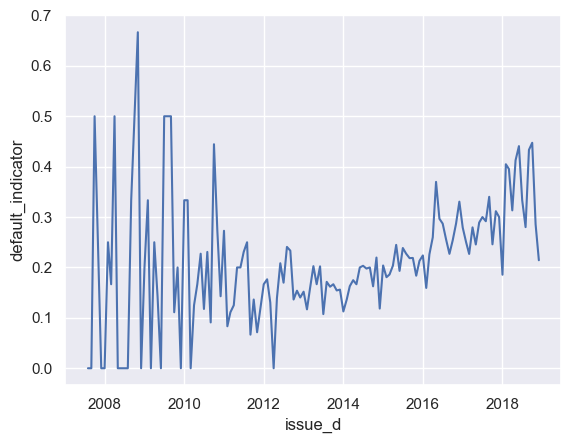

In [42]:
import seaborn as sns
sns.set_theme()
sns.lineplot(monthlyData)

It looks like our monthly default rate varies pretty heavily - it's definitely going to be difficult to model this process accurately... But we can try!

- Ensure that the data is sorted chronologically to maintain the sequence integrity necessary for time series analysis.


In [43]:
monthlyData = monthlyData.sort_index()

In [44]:
monthlyData

issue_d
2007-08-01    0.000000
2007-09-01    0.000000
2007-10-01    0.500000
2007-12-01    0.000000
2008-01-01    0.000000
                ...   
2018-08-01    0.280000
2018-09-01    0.433333
2018-10-01    0.447368
2018-11-01    0.285714
2018-12-01    0.214286
Name: default_indicator, Length: 133, dtype: float64

In [45]:
trainMonthlyData = monthlyData[monthlyData.index.year < 2017] 
testMonthlyData = monthlyData[monthlyData.index.year >= 2017]

- Apply time series forecasting models such as AR, ARMA, and ARIMA to forecast future loan rates.

### AR

In [46]:
from statsmodels.tsa.api import AutoReg, ARIMA, ARDL,ardl_select_order
from statsmodels.tsa.ar_model import ar_select_order
import matplotlib.pyplot as plt

In [47]:
mod = ar_select_order(trainMonthlyData, maxlag=15, glob=True)

c:\Users\IMOsb\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\IMOsb\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [48]:
mod.ar_lags

[1, 9, 12, 14]

In [49]:
optimalARModel = mod.model.fit()

In [50]:
train = list(trainMonthlyData)
test = list(testMonthlyData)
predictions = []
for i in testMonthlyData:
    res = AutoReg(train, lags = mod.ar_lags).fit()
    predictions.append(res.forecast()[0])
    train = train[1:]
    train.append(i)

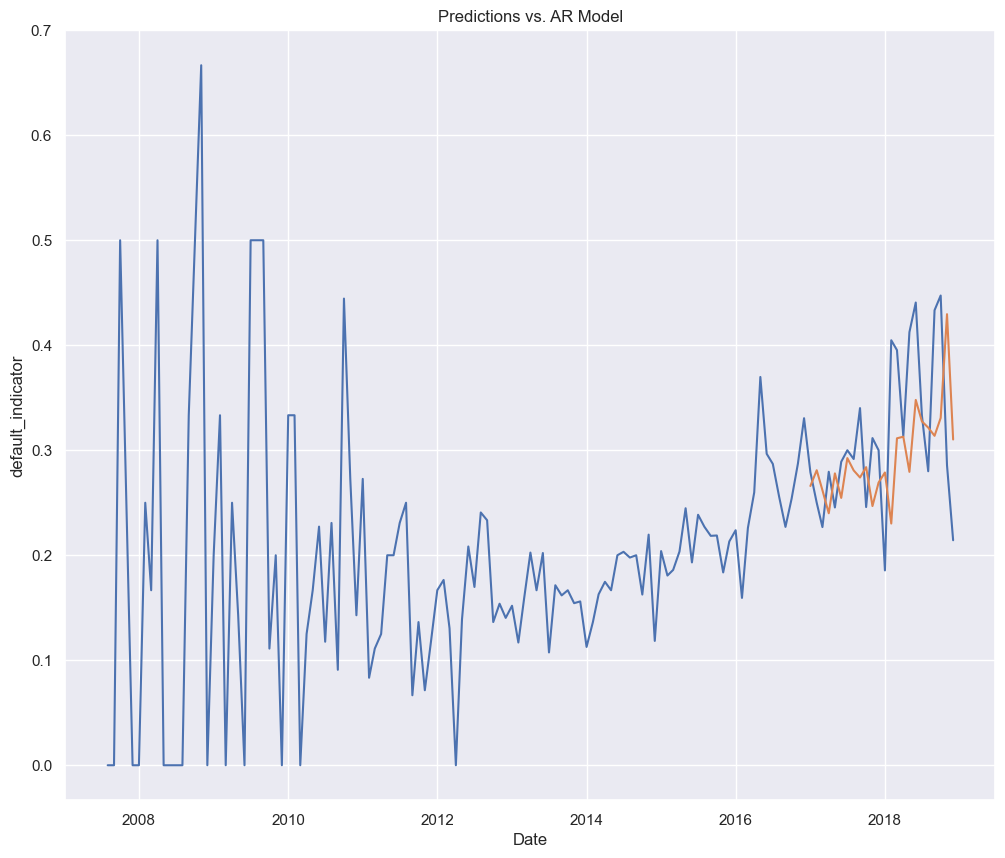

In [51]:
fig, ax = plt.subplots(figsize=(12,10))

sns.lineplot(x=monthlyData.index, y=monthlyData, ax=ax)
sns.lineplot(x=testMonthlyData.index, y=predictions, ax=ax)
ax.set_xlabel("Date")
ax.set_title("Predictions vs. AR Model")
plt.show()

In [52]:
from sklearn.metrics import mean_absolute_percentage_error

In [53]:
mean_absolute_percentage_error(testMonthlyData, predictions)

0.19891702601949893

`20%` isn't terrible, but we'll need to see how this changes...

### MA

In [54]:
from statsmodels.tsa.api import arma_order_select_ic

In [55]:
mods = arma_order_select_ic(monthlyData,max_ar=15, max_ma = 0)

c:\Users\IMOsb\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\IMOsb\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\IMOsb\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\IMOsb\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optim

In [56]:
mods.bic_min_order

(np.int64(9), np.int64(0))

In [57]:
train = list(trainMonthlyData)

MApredictions = []
for i in testMonthlyData:
    res = AutoReg(train, lags = mods.bic_min_order[0]).fit()
    MApredictions.append(res.forecast()[0])
    train = train[1:]
    train.append(i)

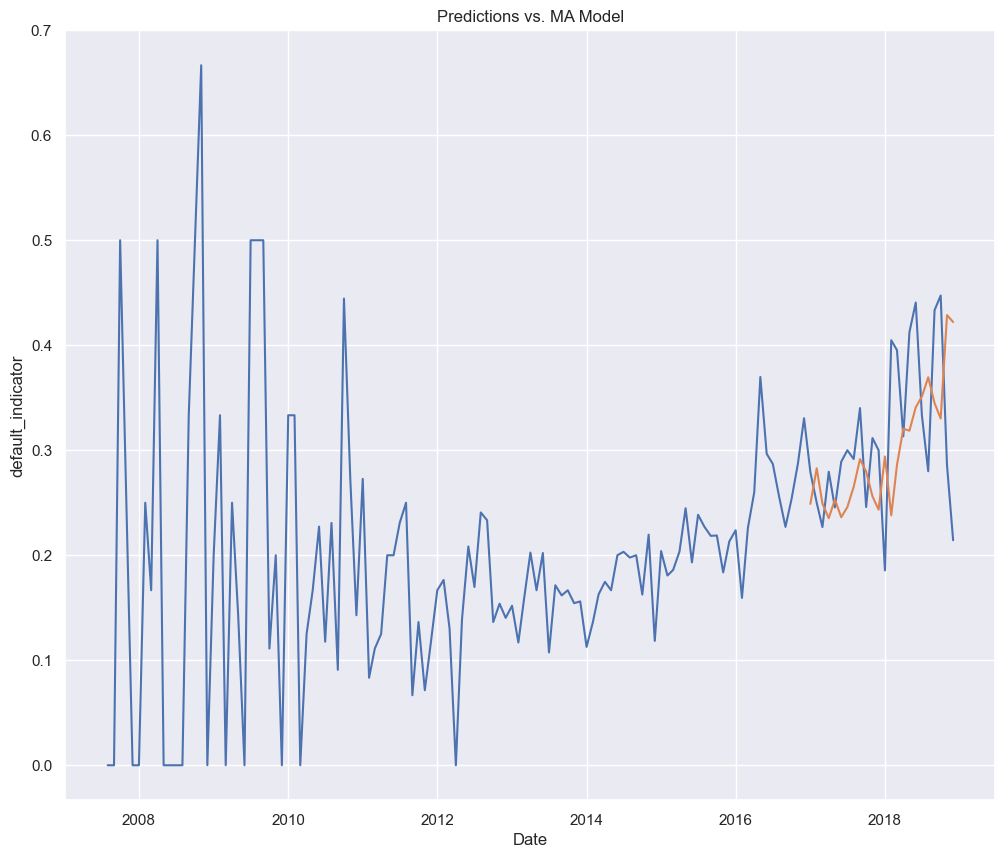

In [58]:
fig, ax = plt.subplots(figsize=(12,10))

sns.lineplot(x=monthlyData.index, y=monthlyData, ax=ax)
sns.lineplot(x=testMonthlyData.index, y=MApredictions, ax=ax)
ax.set_xlabel("Date")
ax.set_title("Predictions vs. MA Model")
plt.show()

This model maybe performs slightly better on the dataset?

In [59]:
mean_absolute_percentage_error(testMonthlyData, MApredictions)

0.23699546230620283

This model is slightly worse than our other option.

### ARMA

In [60]:
mods = arma_order_select_ic(trainMonthlyData, max_ar=10, max_ma = 10)

c:\Users\IMOsb\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\IMOsb\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\IMOsb\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\IMOsb\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optim

In [61]:
order_opt = (mods.bic_min_order[0], 0, mods.bic_min_order[1])
order_opt

(np.int64(0), 0, np.int64(0))

In [62]:
train = list(trainMonthlyData)
test = list(testMonthlyData)
ARIMAPredictions = []
for i in testMonthlyData:
    res = ARIMA(train,order=order_opt)
    res = res.fit(method_kwargs={'maxiter': 500})
    ARIMAPredictions.append(res.forecast()[0])
    train = train[1:]
    train.append(i)

c:\Users\IMOsb\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


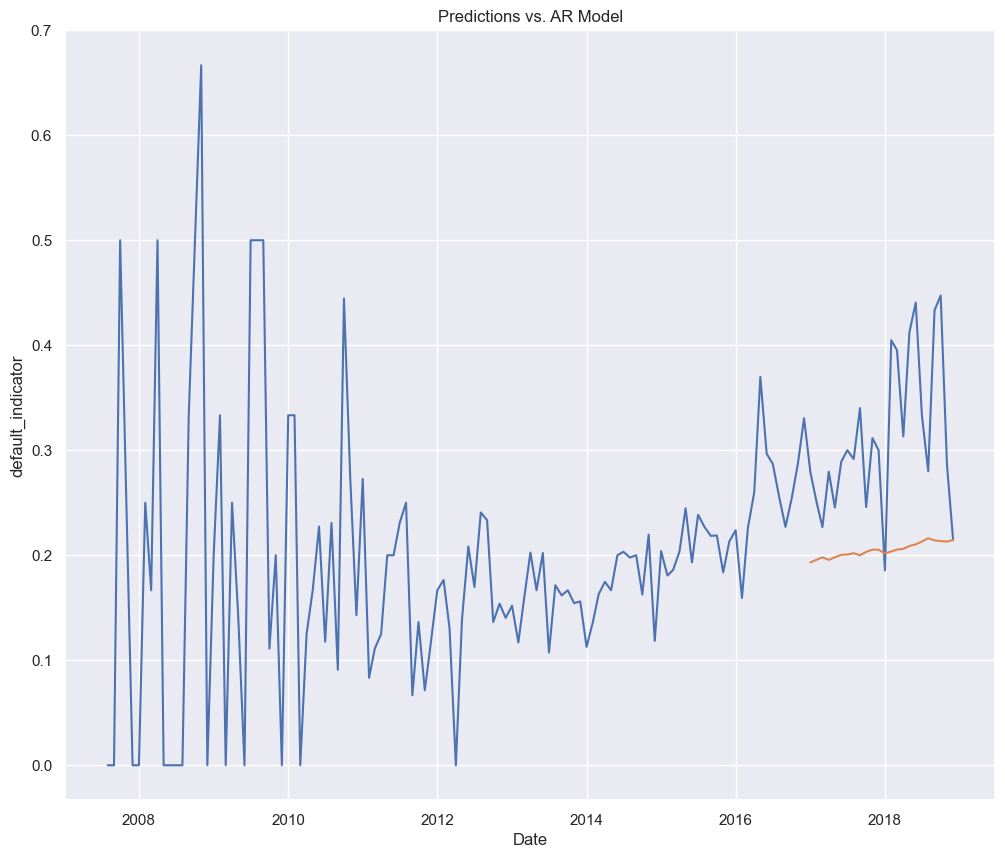

In [63]:
fig, ax = plt.subplots(figsize=(12,10))

sns.lineplot(x=monthlyData.index, y=monthlyData, ax=ax)
sns.lineplot(x=testMonthlyData.index, y=ARIMAPredictions, ax=ax)
ax.set_xlabel("Date")
ax.set_title("Predictions vs. AR Model")
plt.show()

Uhhh yeah that's really problematic...

In [64]:
mean_absolute_percentage_error(testMonthlyData, ARIMAPredictions)

0.31791279350470597

Surprisingly our model metrics aren't terrible compared to our other models, but it is substantially worse. I would recommend using the AR model due to its superior performance on the dataset.